In [56]:
# Formating for modeling

X = train_new.drop(['id', 'revenue'], axis=1)
y = np.log1p(train_new['revenue'])
X_test = test_new.drop(['id'], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [57]:
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}

lgb_model = lgb.LGBMRegressor(**params, n_estimators = 10000, nthread = 4, n_jobs = -1)
lgb_model.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
        verbose=1000, early_stopping_rounds=200)

eli5.show_weights(lgb_model, feature_filter=lambda x: x != '<BIAS>')

Training until validation scores don't improve for 200 rounds.
[1000]	training's rmse: 1.25433	valid_1's rmse: 2.30062
[2000]	training's rmse: 0.957069	valid_1's rmse: 2.27431
Early stopping, best iteration is:
[2786]	training's rmse: 0.790087	valid_1's rmse: 2.26406


Weight,Feature
0.3129,_year_to_log_budget
0.0656,release_year
0.0624,_budget_year_ratio
0.0360,budget
0.0353,runtime
0.0347,_year_to_log_popularity
0.0323,_releaseYear_popularity_ratio
0.0294,genders_2
0.0269,popularity
0.0258,_budget_runtime_ratio


## **Random Search vs. Grid Search**
<br>
While waiting for Random Search doing the job, I will write down the difference between Grid Search and Random Search. <br>Both of them are commonly used hyperparameter optimization tools. However, I prefer to use Random Search, and here is why....<br>First of all, Grid Search takes so much time! I was actually waiting for Grid Search to be done for like 1 hour and found out that I could also use Random Search. <br><br>
<center><div style="width: 300px; font-size:80%; text-align:center;"><img src="https://media.giphy.com/media/RKS1pHGiUUZ2g/giphy.gif " ,> Me waiting for Grid Search to be done</div></center><br>
**Grid Search** tries every combination of a list of values of the hyperparameters that we set and evaluates the model for each combination, while **Random Search** takes random combinations of the hyperparameters to find the best combination for building a model. The chances of finding the optimal parameter are comparatively higher in random search because Random Search end up being trained on the optimized parameters without any aliasing ([Random Search for Hyper-Parameter Optimization paper](http://www.jmlr.org/papers/v13/bergstra12a.html)). If you want to know more about their difference, [Deepak's medium article](https://medium.com/@senapati.dipak97/grid-search-vs-random-search-d34c92946318) is very helpful.

In [58]:
"""
Taking too much time! (I also put too many combinations)

# Print the best parameters found
gridParams = {
    "max_depth": [5,6,7,8],
    "min_data_in_leaf": [15,20,25,30],
    'learning_rate': [0.01,0.005],
    'num_leaves': [15,20,25,30,35,40],
    'boosting_type' : ['gbdt'],
    'objective' : ['regression'],
    'random_state' : [501], # Updated from 'seed'
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4]
    }

grid_search = GridSearchCV(lgb_model, n_jobs=-1, param_grid=gridParams, cv = 3, verbose=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)


Random_Search_Params ={
    "max_depth": [4,5,6],
    "min_data_in_leaf": [15,20,25],
    'learning_rate': [0.01,0.005],
    'num_leaves': [25,30,35,40],
    'boosting_type' : ['gbdt'],
    'objective' : ['regression'],
    'random_state' : [501] # Updated from 'seed'
    }

n_HP_points_to_test = 50

random_search = RandomizedSearchCV(
    estimator=lgb_model, param_distributions= Random_Search_Params, 
    n_iter=n_HP_points_to_test,
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

random_search.fit(X_train, y_train)
print('Best score reached: {} with params: {} '.format(random_search.best_score_, random_search.best_params_))

# Using parameters already set above, replace in the best from the random search

params['learning_rate'] = random_search.best_params_['learning_rate']
params['max_depth'] = random_search.best_params_['max_depth']
params['num_leaves'] = random_search.best_params_['num_leaves']
params['reg_alpha'] = random_search.best_params_['reg_alpha']
params['reg_lambda'] = random_search.best_params_['reg_lambda']


"""

'\nTaking too much time! (I also put too many combinations)\n\n# Print the best parameters found\ngridParams = {\n    "max_depth": [5,6,7,8],\n    "min_data_in_leaf": [15,20,25,30],\n    \'learning_rate\': [0.01,0.005],\n    \'num_leaves\': [15,20,25,30,35,40],\n    \'boosting_type\' : [\'gbdt\'],\n    \'objective\' : [\'regression\'],\n    \'random_state\' : [501], # Updated from \'seed\'\n    \'reg_alpha\' : [1,1.2],\n    \'reg_lambda\' : [1,1.2,1.4]\n    }\n\ngrid_search = GridSearchCV(lgb_model, n_jobs=-1, param_grid=gridParams, cv = 3, verbose=5)\ngrid_search.fit(X_train, y_train)\nprint(grid_search.best_params_)\nprint(grid_search.best_score_)\n\n\nRandom_Search_Params ={\n    "max_depth": [4,5,6],\n    "min_data_in_leaf": [15,20,25],\n    \'learning_rate\': [0.01,0.005],\n    \'num_leaves\': [25,30,35,40],\n    \'boosting_type\' : [\'gbdt\'],\n    \'objective\' : [\'regression\'],\n    \'random_state\' : [501] # Updated from \'seed\'\n    }\n\nn_HP_points_to_test = 50\n\nrandom_

<center>While waiting for Random Search to do the job, watching Panda is a very productive thing to do...! Gotta love pandas ❤️️🐼</center> <br><br>
    
    
<center><iframe width="560" height="315" src="https://www.youtube.com/embed/1v6M41Divso?start=21" frameborder="0" allowfullscreen></iframe></center>

In [59]:
# Obtain from Random Search 

opt_parameters = {'random_state': 501, 'objective': 'regression', 'num_leaves': 40, 'min_data_in_leaf': 15, 'max_depth': 4, 'learning_rate': 0.01, 'boosting_type': 'gbdt'} 

params['learning_rate'] = opt_parameters['learning_rate']
params['max_depth'] = opt_parameters['max_depth']
params['num_leaves'] = opt_parameters['num_leaves']
params['min_data_in_leaf'] = opt_parameters['min_data_in_leaf']

In [60]:
n_fold = 5
random_seed=2222
folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)

def train_model(X, X_test, y, params=None, folds=folds, model_type='lgb', plot_feature_importance=True, model=None):

    oof = np.zeros(X.shape[0])
    prediction = np.zeros(X_test.shape[0])
    scores = []
    feature_importance = pd.DataFrame()
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X)):
        print('Fold', fold_n, 'started at', time.ctime())
        if model_type == 'sklearn':
            X_train, X_valid = X[train_index], X[valid_index]
        else:
            X_train, X_valid = X.values[train_index], X.values[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]
        
        if model_type == 'lgb':
            model = lgb.LGBMRegressor(**params, n_estimators = 10000, nthread = 4, n_jobs = -1)
            model.fit(X_train, y_train, 
                    eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
                    verbose=500, early_stopping_rounds=200)
            
            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test, num_iteration=model.best_iteration_)
            
        if model_type == 'xgb':
            train_data = xgb.DMatrix(data=X_train, label=y_train)
            valid_data = xgb.DMatrix(data=X_valid, label=y_valid)

            watchlist = [(train_data, 'train'), (valid_data, 'valid_data')]
            model = xgb.train(dtrain=train_data, num_boost_round=10000, evals=watchlist, early_stopping_rounds=200, verbose_eval=500, params=params)
            y_pred_valid = model.predict(xgb.DMatrix(X_valid), ntree_limit=model.best_ntree_limit)
            y_pred = model.predict(xgb.DMatrix(X_test.values), ntree_limit=model.best_ntree_limit)

        if model_type == 'sklearn':
            model = model
            model.fit(X_train, y_train)
            y_pred_valid = model.predict(X_valid).reshape(-1,)
            score = mean_squared_error(y_valid, y_pred_valid)
            
            y_pred = model.predict(X_test)
            
        if model_type == 'cat':
            model = CatBoostRegressor(iterations=10000,  eval_metric='RMSE', **params)
            model.fit(X_train, y_train, eval_set=(X_valid, y_valid), cat_features=[], use_best_model=True, verbose=False)
            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test)
        
        oof[valid_index] = y_pred_valid.reshape(-1,)
        scores.append(mean_squared_error(y_valid, y_pred_valid) ** 0.5)
        
        prediction += y_pred    
        
        if model_type == 'lgb':
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = X.columns
            fold_importance["importance"] = model.feature_importances_
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

    prediction /= n_fold
    
    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    
    if model_type == 'lgb':
        feature_importance["importance"] /= n_fold
        if plot_feature_importance:
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:50].index

            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

            plt.figure(figsize=(16, 12));
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
            plt.title('LGB Features (avg over folds)');
        
            return oof, prediction, feature_importance
        return oof, prediction
    
    else:
        return oof, prediction

Fold 0 started at Thu Apr 18 19:57:37 2019
Training until validation scores don't improve for 200 rounds.
[500]	training's rmse: 1.67331	valid_1's rmse: 1.92229
[1000]	training's rmse: 1.48966	valid_1's rmse: 1.88126
[1500]	training's rmse: 1.33536	valid_1's rmse: 1.87057
Early stopping, best iteration is:
[1403]	training's rmse: 1.36219	valid_1's rmse: 1.86962
Fold 1 started at Thu Apr 18 19:57:40 2019
Training until validation scores don't improve for 200 rounds.
[500]	training's rmse: 1.67853	valid_1's rmse: 1.85415
[1000]	training's rmse: 1.50367	valid_1's rmse: 1.8122
[1500]	training's rmse: 1.3644	valid_1's rmse: 1.79749
[2000]	training's rmse: 1.25127	valid_1's rmse: 1.78524
Early stopping, best iteration is:
[1999]	training's rmse: 1.25141	valid_1's rmse: 1.78515
Fold 2 started at Thu Apr 18 19:57:44 2019
Training until validation scores don't improve for 200 rounds.
[500]	training's rmse: 1.69188	valid_1's rmse: 1.84223
[1000]	training's rmse: 1.49978	valid_1's rmse: 1.81763
[

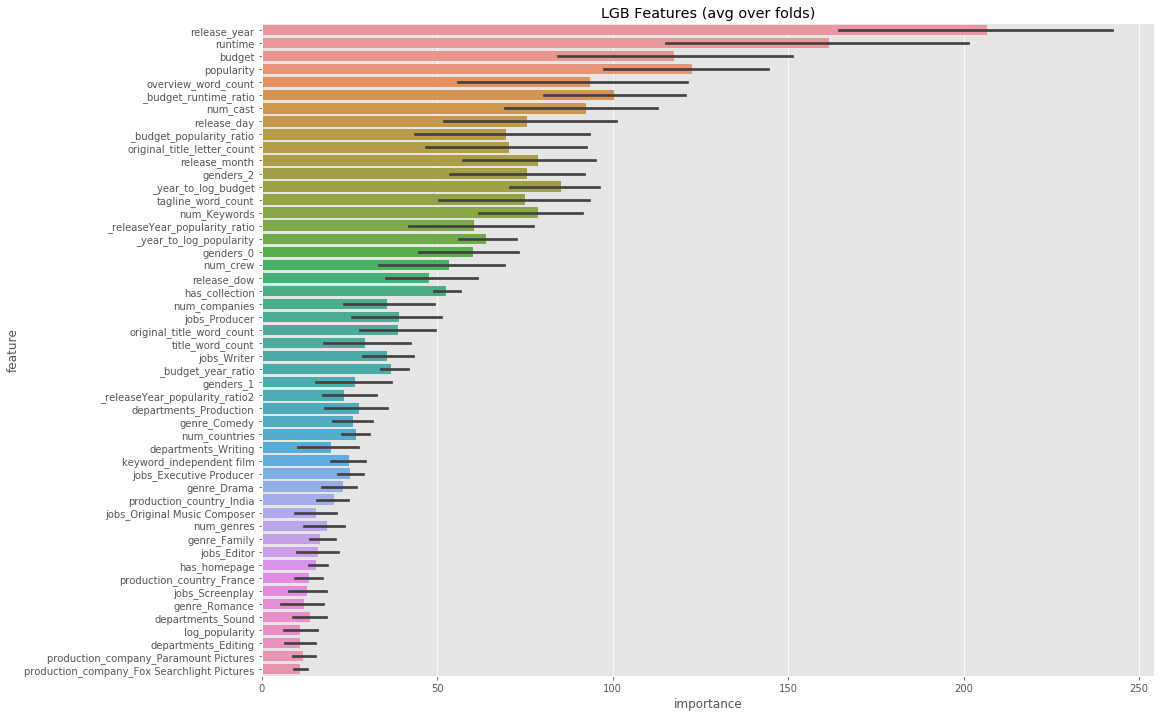

In [61]:
start = time.time()
oof_lgb, prediction_lgb, _ = train_model(X, X_test, y, params=params, model_type='lgb')
end = time.time()

print("time elapsed:",end - start, "second")

In [62]:
xgb_params = {'eta': 0.01,
              'objective': 'reg:linear',
              'max_depth': 6,
              'min_child_weight': 3,
              'subsample': 0.8,
              'colsample_bytree': 0.8,
              'eval_metric': 'rmse',
              'seed': 11,
              'silent': True}

start = time.time()
oof_xgb, prediction_xgb = train_model(X, X_test, y, params=xgb_params, model_type='xgb')
end = time.time()
print("time elapsed:",end - start, "second")

Fold 0 started at Thu Apr 18 19:57:55 2019
[0]	train-rmse:15.5965	valid_data-rmse:15.7602
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.
[500]	train-rmse:1.20013	valid_data-rmse:1.8943
[1000]	train-rmse:0.875865	valid_data-rmse:1.87044
Stopping. Best iteration:
[901]	train-rmse:0.92976	valid_data-rmse:1.86936

Fold 1 started at Thu Apr 18 19:58:12 2019
[0]	train-rmse:15.6405	valid_data-rmse:15.585
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.
[500]	train-rmse:1.23115	valid_data-rmse:1.84705
[1000]	train-rmse:0.905396	valid_data-rmse:1.80849
[1500]	train-rmse:0.689536	valid_data-rmse:1.79536
[2000]	train-rmse:0.528614	valid_data-rmse:1.78935
Stopping. Best iteration:
[2074]	train-rmse:0.507307	valid_data-rmse:1.78824

Fold 2 started at Thu Apr 18 19:58:47 2019
[0]	train-r

In [63]:
sam_sub['revenue'] = np.expm1(prediction_lgb)
sam_sub.to_csv("lgb.csv", index=False)
sam_sub['revenue'] = np.expm1(prediction_xgb)
sam_sub.to_csv("xgb.csv", index=False)
sam_sub['revenue'] = np.expm1((prediction_lgb + prediction_xgb) / 2)
sam_sub.to_csv("blend_lgb_xgb.csv", index=False)

## **Work in Progress...** <br><br>

I will keep working on building more models until I get a better score! <br>Thank you for reading my kernel and don't forget to vote if you enjoyed my kernel 😊<br><br>
    <center><strong>Ending the kernel with the best decision-making model in this century....</strong> </center><br>
<img src="https://media.giphy.com/media/wPygVtYTyXkfC/giphy.gif "  height="400px" width="400px">

